In [2]:
import os, sys, json

sys.path.append("../")
sys.path.append("../src/")
sys.path.append("../data/")
sys.path.append("../model_evaluation")
sys.path.append("../model_evaluation/evaluation")

In [3]:
from text_evaluation import text_similarity as ts
import bpmn_similarity

/Users/I741988/round-trip/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/I741988/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
path_text_1 = "../data/edge_case/original/generated_process_description/"
path_text_2 = "../data/edge_case/changed/generated_process_description/"
# path_text_1 = "../data/edge_case/original/process_descriptions/"
# path_text_2 = "../data/edge_case/changed/process_descriptions/"
path_model_1 = "../data/edge_case/original/ground_json/"
path_model_2 = "../data/edge_case/changed/ground_json/"

In [4]:
eval = {"text_sts": [], "text_sentence_sim": [], "model": []}
for i in ["1_2", "3_3", "10_6"]:
    with open(path_text_1 + i + ".txt", "r") as file:
        file_1 = file.read()

    with open(path_text_2 + i + ".txt", "r") as file:
        file_2 = file.read()

    with open(path_model_1 + i + ".json", "r") as infile:
        g1 = json.load(infile)

    with open(path_model_2 + i + ".json", "r") as infile:
        g2 = json.load(infile)

    sentences_1 = ts.get_sentences(file_1)
    sentences_2 = ts.get_sentences(file_2)

    adjusted_sen2 = ts.align_sentences(sentences_1, sentences_2, threshold=0.8)
    sequence_similarity = ts.sequence_similarity(sentences_1, adjusted_sen2)
    overalll_sim = 0.5 * ts.sts_bert(file_1, file_2) + 0.5 * sequence_similarity

    eval["text_sts"].append(ts.sts_bert(file_1, file_2))
    eval["text_sentence_sim"].append(overalll_sim)
    eval["model"].append(
        bpmn_similarity.calculate_similarity_scores(g1, g2, method="dice", similarity_threshold=0.98)[0]["overall"]
    )

In [ ]:
def text_similarity_alternative(file_1, file_2, threshold=0.8):
    """
    Args:
        file_1, file_2:  2 input text files.
    Returns:
        float: an overall similarity score.
    """
    sentences_1 = ts.get_sentences(file_1)
    sentences_2 = ts.get_sentences(file_2)
    adjusted_sen2 = ts.align_sentences(sentences_1, sentences_2, threshold=threshold)
    sequence_similarity = ts.sequence_similarity(sentences_1, adjusted_sen2)
    overall_sim = 0.5 * ts.sts_bert(file_1, file_2) + 0.5 * sequence_similarity
    return overall_sim

['I am a piece of text!', 'can you see me?']

In [7]:
from matplotlib import pyplot as plt

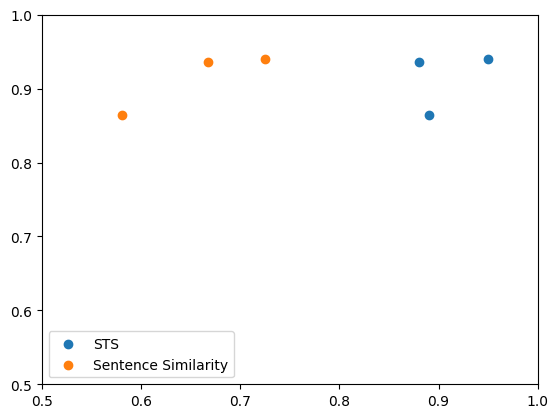

In [12]:
plt.scatter(eval["text_sts"], eval["model"], label="STS")
plt.scatter(eval["text_sentence_sim"], eval["model"], label="Sentence Similarity")
plt.xlim(0.5, 1)
plt.ylim(0.5, 1)
plt.legend()